In [1]:
import math, itertools, copy
import numpy as np
import matplotlib.pyplot as plt

from pgmpy.factors.discrete import TabularCPD, DiscreteFactor
from pgmpy.models import ClusterGraph, MarkovModel, BayesianModel
from pgmpy.inference.ExactInference import BeliefPropagation

from pgm_utils import *
from pgm_algorithms import MeanFieldInference, LoopyBeliefPropagation

%matplotlib inline

In [11]:
def experiment_4():
    # Set up factors
    np.random.seed(seed=1)
    inner = (1,100)
    outer = (1,25)
    F_1_edge = (100,200)
    F_2_edge = (1,10)
    other_size=100
    F_size=2
    
    A = DiscreteFactor(variables=["A"], cardinality=[other_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=(other_size)))
    B = DiscreteFactor(variables=["B"], cardinality=[other_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=[other_size]))
    C = DiscreteFactor(variables=["C"], cardinality=[other_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=[other_size]))
    D = DiscreteFactor(variables=["D"], cardinality=[other_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=[other_size]))
    E = DiscreteFactor(variables=["E"], cardinality=[other_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=[other_size]))
    F = DiscreteFactor(variables=["F"], cardinality=[F_size],
                       values=np.random.uniform(inner[0], inner[1],
                                                size=[F_size]))
    
    AF = DiscreteFactor(variables=["A","F"], cardinality=[other_size, F_size],
                        values=np.random.uniform(F_1_edge[0], F_1_edge[1],
                                                 size=[other_size, F_size]))
    BF = DiscreteFactor(variables=["B","F"], cardinality=[other_size, F_size],
                        values=np.random.uniform(F_1_edge[0], F_1_edge[1],
                                                 size=[other_size, F_size]))
    CF = DiscreteFactor(variables=["C","F"], cardinality=[other_size, F_size],
                        values=np.random.uniform(F_1_edge[0], F_1_edge[1],
                                                 size=[other_size, F_size]))
    DF = DiscreteFactor(variables=["D","F"], cardinality=[other_size, F_size],
                        values=np.random.uniform(F_2_edge[0], F_2_edge[1],
                                                 size=[other_size, F_size]))
    EF = DiscreteFactor(variables=["E","F"], cardinality=[other_size, F_size],
                        values=np.random.uniform(F_2_edge[0], F_2_edge[1],
                                                 size=[other_size, F_size]))
    
    my_factors = [A,B,C,D,E,F,AF,BF,CF,DF,EF]
    
    network = MarkovModel([('A','F'), ('B','F'), ('C','F'),
                           ('D','F'), ('E','F')])
    
    network.add_factors(*my_factors)
        
    print("Is model valid?", network.check_model())
    
    for f in my_factors:
        f.normalize()
        
    for f in my_factors:
        print(f)
    
    return my_factors, network

In [12]:
my_factors, network = experiment_4()

Is model valid? True
╒══════╤══════════╕
│ A    │   phi(A) │
╞══════╪══════════╡
│ A_0  │   0.0087 │
├──────┼──────────┤
│ A_1  │   0.0144 │
├──────┼──────────┤
│ A_2  │   0.0008 │
├──────┼──────────┤
│ A_3  │   0.0065 │
├──────┼──────────┤
│ A_4  │   0.0036 │
├──────┼──────────┤
│ A_5  │   0.0025 │
├──────┼──────────┤
│ A_6  │   0.0043 │
├──────┼──────────┤
│ A_7  │   0.0073 │
├──────┼──────────┤
│ A_8  │   0.0083 │
├──────┼──────────┤
│ A_9  │   0.0110 │
├──────┼──────────┤
│ A_10 │   0.0087 │
├──────┼──────────┤
│ A_11 │   0.0138 │
├──────┼──────────┤
│ A_12 │   0.0047 │
├──────┼──────────┤
│ A_13 │   0.0174 │
├──────┼──────────┤
│ A_14 │   0.0013 │
├──────┼──────────┤
│ A_15 │   0.0135 │
├──────┼──────────┤
│ A_16 │   0.0087 │
├──────┼──────────┤
│ A_17 │   0.0114 │
├──────┼──────────┤
│ A_18 │   0.0035 │
├──────┼──────────┤
│ A_19 │   0.0045 │
├──────┼──────────┤
│ A_20 │   0.0160 │
├──────┼──────────┤
│ A_21 │   0.0191 │
├──────┼──────────┤
│ A_22 │   0.0067 │
├──────┼──────────┤

In [13]:
mfa = MeanFieldInference(my_factors)
mfa_h = mfa.mean_field_approximation()
for k,q in mfa.Q.items():
    if k == 'F':
        print(q.normalize(inplace=False))

╒═════╤══════════╕
│ F   │   phi(F) │
╞═════╪══════════╡
│ F_0 │   0.3971 │
├─────┼──────────┤
│ F_1 │   0.6029 │
╘═════╧══════════╛


Number of iterations: 20


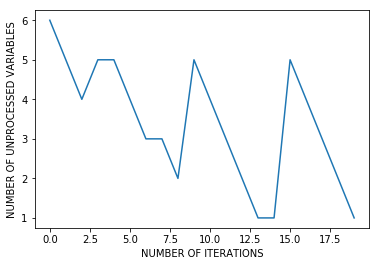

In [14]:
print("Number of iterations:", mfa_h["iterations"])
plt.plot(mfa_h["processed"])
plt.xlabel("NUMBER OF ITERATIONS")
plt.ylabel("NUMBER OF UNPROCESSED VARIABLES")
plt.show()

In [15]:
# Test LBP
lbp = LoopyBeliefPropagation(my_factors)
lbp_h = lbp.loopy_belief_propagation(lambd=0.1, num_iterations=5000)

F ('C', 'F') has converged at iteration 626
('D', 'F') F has converged at iteration 627
F ('C', 'F') has converged at iteration 627
('D', 'F') F has converged at iteration 628
F ('C', 'F') has converged at iteration 628
('D', 'F') F has converged at iteration 629
F ('C', 'F') has converged at iteration 629
('D', 'F') F has converged at iteration 630
F ('A', 'F') has converged at iteration 630
F ('C', 'F') has converged at iteration 630
F ('E', 'F') has converged at iteration 630
F ('B', 'F') has converged at iteration 630
('D', 'F') F has converged at iteration 631
F ('A', 'F') has converged at iteration 631
F ('C', 'F') has converged at iteration 631
F ('E', 'F') has converged at iteration 631
F ('B', 'F') has converged at iteration 631
('D', 'F') F has converged at iteration 632
F ('A', 'F') has converged at iteration 632
F ('C', 'F') has converged at iteration 632
F ('E', 'F') has converged at iteration 632
F ('B', 'F') has converged at iteration 632
('D', 'F') F has converged at it

('D', 'F') F has converged at iteration 679
F ('A', 'F') has converged at iteration 679
F ('C', 'F') has converged at iteration 679
F ('E', 'F') has converged at iteration 679
F ('B', 'F') has converged at iteration 679
('D', 'F') F has converged at iteration 680
F ('A', 'F') has converged at iteration 680
F ('C', 'F') has converged at iteration 680
F ('E', 'F') has converged at iteration 680
F ('B', 'F') has converged at iteration 680
('D', 'F') F has converged at iteration 681
F ('A', 'F') has converged at iteration 681
F ('C', 'F') has converged at iteration 681
F ('E', 'F') has converged at iteration 681
F ('B', 'F') has converged at iteration 681
('D', 'F') F has converged at iteration 682
F ('A', 'F') has converged at iteration 682
F ('C', 'F') has converged at iteration 682
F ('E', 'F') has converged at iteration 682
F ('B', 'F') has converged at iteration 682
('D', 'F') F has converged at iteration 683
F ('A', 'F') has converged at iteration 683
F ('C', 'F') has converged at it

('D', 'F') F has converged at iteration 725
B ('B', 'F') has converged at iteration 725
F ('A', 'F') has converged at iteration 725
F ('C', 'F') has converged at iteration 725
F ('E', 'F') has converged at iteration 725
F ('B', 'F') has converged at iteration 725
C ('C', 'F') has converged at iteration 725
('A', 'F') A has converged at iteration 725
('D', 'F') F has converged at iteration 726
B ('B', 'F') has converged at iteration 726
F ('A', 'F') has converged at iteration 726
F ('C', 'F') has converged at iteration 726
F ('E', 'F') has converged at iteration 726
F ('B', 'F') has converged at iteration 726
C ('C', 'F') has converged at iteration 726
('A', 'F') A has converged at iteration 726
('D', 'F') F has converged at iteration 727
B ('B', 'F') has converged at iteration 727
F ('A', 'F') has converged at iteration 727
F ('C', 'F') has converged at iteration 727
F ('E', 'F') has converged at iteration 727
F ('B', 'F') has converged at iteration 727
C ('C', 'F') has converged at it

In [16]:
for k,cb in lbp.cluster_beliefs.items():
    if k == 'F':
        print(cb.normalize(inplace=False))

╒═════╤══════════╕
│ F   │   phi(F) │
╞═════╪══════════╡
│ F_0 │   0.2895 │
├─────┼──────────┤
│ F_1 │   0.7105 │
╘═════╧══════════╛


In [17]:
for _,sb in lbp.sepset_beliefs.items():
    break
    print(sb.normalize(inplace=False))

Number of iterations: 741


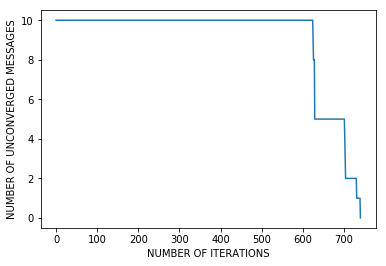

In [18]:
print("Number of iterations:", lbp_h["iterations"])
plt.plot(lbp_h["convergence"])
plt.xlabel("NUMBER OF ITERATIONS")
plt.ylabel("NUMBER OF UNCONVERGED MESSAGES")
plt.show()

In [19]:
bp = BeliefPropagation(network)
bp.calibrate()
vars_to_query = set()
for f in my_factors:
    vars_query = f.scope()
    vars_to_query = vars_to_query.union(vars_query)
for v in vars_to_query:
    f = bp.query([v])
    if v == 'F':
        print(f[v])

╒═════╤══════════╕
│ F   │   phi(F) │
╞═════╪══════════╡
│ F_0 │   0.2895 │
├─────┼──────────┤
│ F_1 │   0.7105 │
╘═════╧══════════╛
